In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data=pd.read_csv('crop.csv')
x=data.iloc[:,3:11].values
y=data.iloc[:,11].values


In [12]:
data

,S.NO,PLACE,crop,seed,season,soil,humidity,airquality,laborcosts,fertilizer,water level,yield
0,1,Uttar Pradesh,Paddy,organic,Kharif,Sandy,26,4.8,4000,Urea,24.5,9.83
1,2,Karnataka,Paddy,organic,Kharif,Loamy,55,3.1,4500,DAP,45.2,7.47
2,3,Gujarat,Paddy,organic,Kharif,Black,6,32.5,15000,DAP,77.3,49.56
3,4,Andhra Pradesh,Paddy,hybrid,Whole Year,Red,5,6.3,6000,DAP,41.1,6.42
4,5,Maharashtra,Paddy,hybrid,Whole Year,Clayey,14,4.7,5500,Urea,56.2,8.72
5,6,Maharashtra,Paddy,organic,Whole Year,Sandy,66,6.4,5000,Urea,29.2,5.45
6,7,Punjab,Paddy,hybrid,Whole Year,Red,57,5.4,6500,DAP,35.2,9.65
7,8,Andhra Pradesh,Paddy,hybrid,Whole Year,Loamy,45,4.7,6200,Urea,47.2,12.30
8,9,Gujarat,Wheat,hybrid,Whole Year,Sandy,50,4.2,9000,DAP,36.4,15.30
9,10,Haryana,Wheat,organic,Whole Year,Black,12,30.9,14750,Urea,69.1,29.90


In [13]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
label=LabelEncoder()
x[:,0]=label.fit_transform(x[:,0])
x[:,1]=label.fit_transform(x[:,1])
x[:,2]=label.fit_transform(x[:,2])
x[:,6]=label.fit_transform(x[:,6])

In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=33)

In [15]:

from sklearn.linear_model import LinearRegression
main=LinearRegression()
main=main.fit(xtrain,ytrain)

In [16]:
ypred=main.predict(xtest)

In [17]:
from sklearn.metrics import r2_score
r2_score(ytest,ypred)

0.8252625582026729

In [18]:
data=data.drop(['S.NO'], axis=1)
corr=data.corr()
corr

,humidity,airquality,laborcosts,water level,yield
humidity,1.000000,-0.031613,-0.140869,-0.155547,-0.316639
airquality,-0.031613,1.000000,0.283491,0.248255,0.474705
laborcosts,-0.140869,0.283491,1.000000,0.240802,0.272513
water level,-0.155547,0.248255,0.240802,1.000000,0.637987
yield,-0.316639,0.474705,0.272513,0.637987,1.000000


In [29]:
data.head(10)

,PLACE,crop,seed,season,soil,humidity,airquality,laborcosts,fertilizer,water level,yield
0,Uttar Pradesh,Paddy,organic,Kharif,Sandy,26,4.8,4000,Urea,24.5,9.83
1,Karnataka,Paddy,organic,Kharif,Loamy,55,3.1,4500,DAP,45.2,7.47
2,Gujarat,Paddy,organic,Kharif,Black,6,32.5,15000,DAP,77.3,49.56
3,Andhra Pradesh,Paddy,hybrid,Whole Year,Red,5,6.3,6000,DAP,41.1,6.42
4,Maharashtra,Paddy,hybrid,Whole Year,Clayey,14,4.7,5500,Urea,56.2,8.72
5,Maharashtra,Paddy,organic,Whole Year,Sandy,66,6.4,5000,Urea,29.2,5.45
6,Punjab,Paddy,hybrid,Whole Year,Red,57,5.4,6500,DAP,35.2,9.65
7,Andhra Pradesh,Paddy,hybrid,Whole Year,Loamy,45,4.7,6200,Urea,47.2,12.30
8,Gujarat,Wheat,hybrid,Whole Year,Sandy,50,4.2,9000,DAP,36.4,15.30
9,Haryana,Wheat,organic,Whole Year,Black,12,30.9,14750,Urea,69.1,29.90


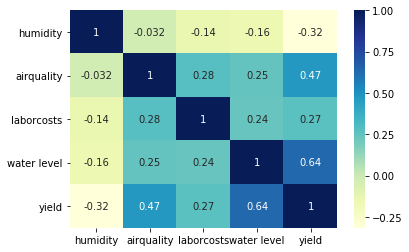

In [19]:
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,cmap="YlGnBu",annot=True)

In [20]:
yields=data.iloc[:,10].values

In [21]:
seeds=data.iloc[:,2].values
soil=data.iloc[:,4].values
fert=data.iloc[:,8].values
season=data.iloc[:,3].values

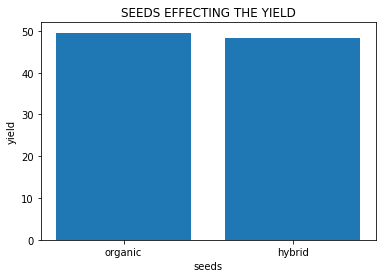

In [22]:
plt.bar(seeds,yields)
plt.xlabel('seeds', fontsize=10)
plt.ylabel('yield', fontsize=10)
plt.title('SEEDS EFFECTING THE YIELD')
plt.show()

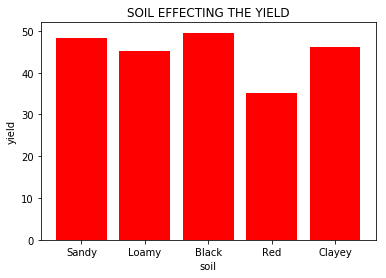

In [23]:
plt.bar(soil,yields,color='r')
plt.xlabel('soil', fontsize=10)
plt.ylabel('yield', fontsize=10)
plt.title('SOIL EFFECTING THE YIELD')
plt.show()

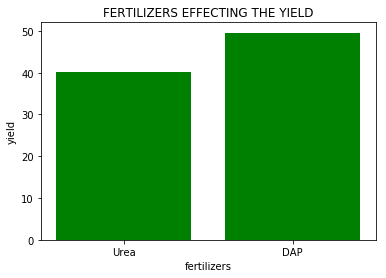

In [24]:
plt.bar(fert,yields,color='g')
plt.xlabel('fertilizers', fontsize=10)
plt.ylabel('yield', fontsize=10)
plt.title('FERTILIZERS EFFECTING THE YIELD')
plt.show()

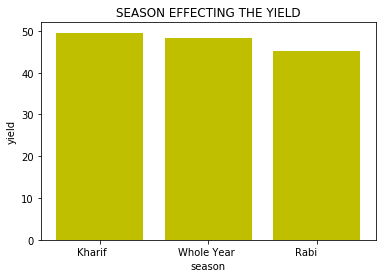

In [25]:
plt.bar(season,yields,color='y')
plt.xlabel('season', fontsize=10)
plt.ylabel('yield', fontsize=10)
plt.title('SEASON EFFECTING THE YIELD')
plt.show()

In [26]:
humid=data.iloc[:,5].values

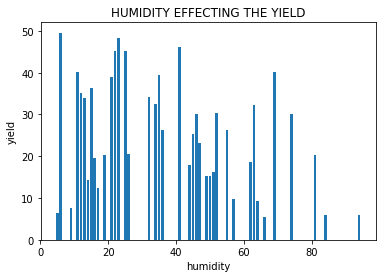

In [27]:
plt.bar(humid,yields)
plt.xlabel('humidity', fontsize=10)
plt.ylabel('yield', fontsize=10)
plt.title('HUMIDITY EFFECTING THE YIELD')
plt.show()